Завдання для бінарної класифікації (Binary Classification)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv('classification_dataset.csv')
data


,Feature1,Feature2,Target
0,-0.872929,0.013042,1
1,1.312935,2.770534,1
2,2.340428,2.420996,1
3,2.294548,-0.404380,1
4,0.944105,0.477241,1
...,...,...,...
195,-2.325239,-0.919512,0
196,-0.741314,1.970952,0
197,-0.581615,1.196672,0
198,0.871664,1.690409,1


Оцінка ефективності:
* Найкращі параметри: {'C': 1, 'max_iter': 100}
* Точність: 0.85
* Відгук: 0.93
* F1-середнє: 0.81
* AUC-ROC: 0.94


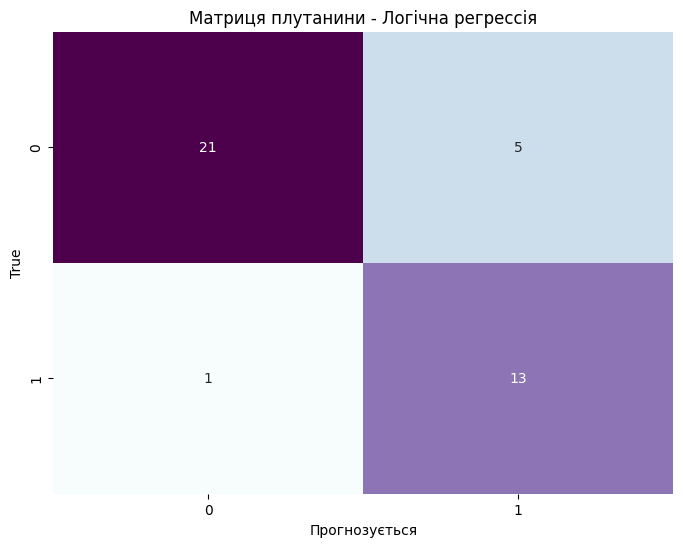

In [15]:

X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'max_iter': [100, 200, 300, 400] 
}

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)


print("Оцінка ефективності:")
print("* Найкращі параметри:", best_params)
print("* Точність: {:.2f}".format(accuracy))
print("* Відгук: {:.2f}".format(recall))
print("* F1-середнє: {:.2f}".format(f1))
print("* AUC-ROC: {:.2f}".format(roc_auc))

# * Візуалізація матриці плутанини
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Прогнозується')
plt.ylabel('True')
plt.title('Матриця плутанини - Логічна регрессія')
plt.show()

Завдання для мультикласової класифікації (Multiclass Classification)

In [36]:
data = pd.read_csv('multiclass_dataset.csv')

X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


param_grid_rfc = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 150]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'], 
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1] 
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400]
}

model_rfc = RandomForestClassifier(random_state=13)

model_svc = SVC()

model_lr = LogisticRegression()

data


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Target
0,-1.810057,-0.673058,0.086590,-0.155677,0.181484,1.025221,1
1,-1.902231,-0.843628,0.632782,2.270693,0.671189,1.190941,1
2,0.854693,0.706958,-0.524520,0.489375,-1.457497,-0.808198,2
3,-2.540925,-1.049519,-1.304470,0.669673,0.623820,1.526378,0
4,1.257316,0.035007,-0.858358,0.700310,1.398636,-0.351927,3
...,...,...,...,...,...,...,...
195,-0.430646,-0.390659,-0.444293,0.377300,0.855820,0.435911,1
196,0.459709,0.666906,-1.407512,-0.777817,-1.794455,-0.673442,2
197,-0.792734,0.060648,-0.238948,-0.907564,-1.173436,0.152996,0
198,-0.134888,-0.549884,-0.575638,0.122010,1.775143,0.492595,3


In [50]:
grid_search = GridSearchCV(estimator=model_rfc, param_grid=param_grid_rfc, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
    
print('Оцінка ефективності RandomForestClassifier')
print("* Найкращі параметри:", best_params)
print("* Точність: {:.2f}".format(accuracy))
print("* Відгук: {:.2f}".format(recall))
print("* F1-середнє: {:.2f}".format(f1))
print("* Матриця плутанини:")
print(conf_matrix)
print("\n")

Оцінка ефективності RandomForestClassifier
* Найкращі параметри: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
* Точність: 0.72
* Відгук: 0.72
* F1-середнє: 0.72
* Матриця плутанини:
[[9 0 2 0]
 [2 9 0 0]
 [3 0 6 1]
 [0 3 0 5]]




In [49]:
grid_search = GridSearchCV(estimator=model_svc, param_grid=param_grid_svc, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
    
print('Оцінка ефективності SVC')
print("* Найкращі параметри:", best_params)
print("* Точність: {:.2f}".format(accuracy))
print("* Відгук: {:.2f}".format(recall))
print("* F1-середнє: {:.2f}".format(f1))
print("* Матриця плутанини:")
print(conf_matrix)
print("\n")

Оцінка ефективності SVC
* Найкращі параметри: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
* Точність: 0.70
* Відгук: 0.70
* F1-середнє: 0.70
* Матриця плутанини:
[[8 1 2 0]
 [2 7 0 2]
 [3 0 6 1]
 [0 1 0 7]]




In [48]:
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
    
print('Оцінка ефективності Логічною регрессією')
print("* Найкращі параметри:", best_params)
print("* Точність: {:.2f}".format(accuracy))
print("* Відгук: {:.2f}".format(recall))
print("* F1-середнє: {:.2f}".format(f1))
print("* Матриця плутанини:")
print(conf_matrix)
print("\n")

Оцінка ефективності Логічною регрессією
* Найкращі параметри: {'C': 0.01, 'max_iter': 100}
* Точність: 0.75
* Відгук: 0.75
* F1-середнє: 0.75
* Матриця плутанини:
[[9 0 2 0]
 [2 8 0 1]
 [1 0 7 2]
 [0 2 0 6]]




Завдання для мультилейбл класифікації (Multilabel Classification)

In [52]:
import pandas as pd
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('multilabel_dataset.csv')

X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


param_grid = {
    'estimator__max_depth': [10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__n_estimators': [50, 100, 150]
}

data

,Feature1,Feature2,Feature3,Label1,Label2,Label3,Label4
0,8.0,17.0,16.0,0,1,1,0
1,11.0,17.0,15.0,1,0,0,1
2,25.0,15.0,20.0,0,0,1,1
3,7.0,17.0,29.0,1,1,1,0
4,15.0,27.0,22.0,0,1,1,1
...,...,...,...,...,...,...,...
195,10.0,30.0,17.0,0,1,0,0
196,19.0,23.0,18.0,1,0,0,1
197,27.0,28.0,5.0,0,0,0,1
198,13.0,12.0,25.0,0,1,1,0


In [54]:
model = MultiOutputClassifier(RandomForestClassifier(random_state=13))
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, multilabel_confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
precision = [round(p, 2) for p in precision]
recall = [round(r, 2) for r in recall]
f1 = [round(f, 2) for f in f1]


print("Оцінка ефективності:")
print("* Найкращі параметри:", best_params)
print("* Точність: {:.2f}".format(accuracy))
print("* Відгук: ", recall)
print("* F1-середнє: ", f1)
for i, confusion_matrix in enumerate(conf_matrix, start=1):
    print(f"\n Матриця плутанини для Label {i}:\n{confusion_matrix}\n")

Оцінка ефективності:
* Найкращі параметри: {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50}
* Точність: 0.42
* Відгук:  [0.5, 0.85, 0.76, 0.45]
* F1-середнє:  [0.57, 0.81, 0.8, 0.51]

 Матриця плутанини для Label 1:
[[30  2]
 [ 4  4]]


 Матриця плутанини для Label 2:
[[15  5]
 [ 3 17]]


 Матриця плутанини для Label 3:
[[16  3]
 [ 5 16]]


 Матриця плутанини для Label 4:
[[11  7]
 [12 10]]

